In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
# Import time-frequency functions
from neurodsp.timefrequency import amp_by_time, freq_by_time, phase_by_time, compute_wavelet_transform

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.time_series import plot_time_series, plot_instantaneous_measure

In [4]:
from ecephys.sglx_utils import load_timeseries
from ecephys.signal.timefrequency import compute_spectrogram_welch, get_bandpower, parallel_spectrogram_welch
from ecephys.plot import plot_spectrogram, plot_hypnogram_overlay
from ecephys.scoring import load_visbrain_hypnogram, filter_states
from ecephys.helpers import all_arrays_equal

In [5]:
bin_path = Path('/Volumes/neuropixel/Data/CNPIX4-Doppio/3-18-2020_g0_t3.imec0.lf.bin')
chans = [374, 377, 378, 381, 382]

In [6]:
(times, sig, fs) = load_timeseries(bin_path, chans, start_time=None, end_time=600)

nChan: 385, nFileSamp: 18000019


In [15]:
sig = sig.flatten()
freqs, spg_times, spg = compute_spectrogram_welch(sig, fs)

In [22]:
freqs, spg_times, spg = parallel_spectrogram_welch(sig, fs)
spg = np.median(spg, axis=-1)

In [ ]:
plot_spectrogram(freqs, spg_times, spg, yscale='log')

In [25]:
swa_range = (0.5, 4)
swa = get_bandpower(freqs, spg_times, spg, f_range=swa_range)

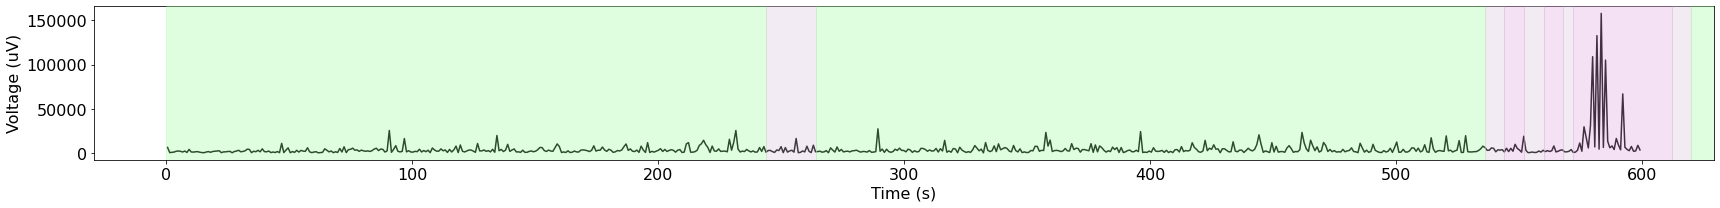

In [26]:
hypno_path = Path('/Volumes/neuropixel/Data/CNPIX4-Doppio/3-18-2020_g0_t3.hypnogram.txt')
hypno = load_visbrain_hypnogram(hypno_path)

_, ax = plt.subplots(figsize=(24, 3))
plot_time_series(spg_times, swa, ax=ax)
plot_hypnogram_overlay(hypno, ax=ax)